/var/folders/vg/bxzl7hss0gs1hqxsc9zj92l80000gn/T/ipykernel_93166/2814182091.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


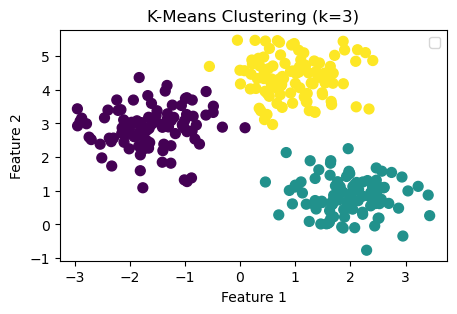

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
X_scaled = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(5, 3))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.title('K-Means Clustering (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.savefig("images/2/kmeans_ex.png", dpi=300, bbox_inches='tight')
plt.show()

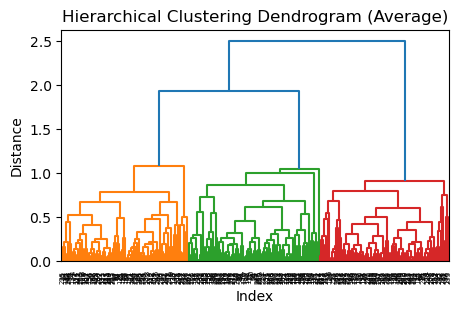

In [17]:
import scipy.cluster.hierarchy as sch
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_scaled, method='average')

plt.figure(figsize=(5, 3))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Average)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.savefig("images/2/hclust_ex.png", dpi=300, bbox_inches='tight')
plt.show()


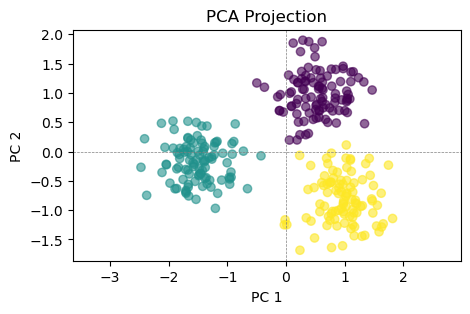

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(5, 3))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis', alpha=0.6)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title('PCA Projection')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.axis('equal')
plt.savefig("images/2/pca_ex.png", dpi=300, bbox_inches='tight')
plt.show()

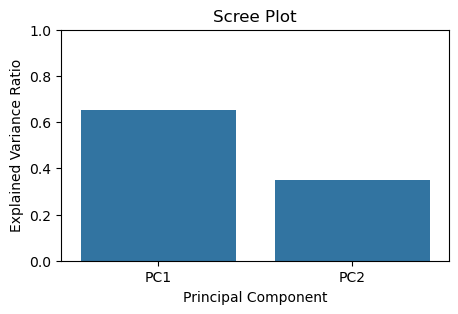

In [26]:
import seaborn as sns

# Plot explained variance
plt.figure(figsize=(5, 3))
sns.barplot(x=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
            y=pca.explained_variance_ratio_)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.ylim(0, 1)
plt.savefig("images/2/scree_ex.png", dpi=300, bbox_inches='tight')
plt.show()